<a href="https://colab.research.google.com/github/RahulKujur094/Machine_Learning_Core/blob/main/Feature_PreProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

             Null Count  Null Percentage
deck                688        77.216611
age                 177        19.865320
embarked              2         0.224467
embark_town           2         0.224467
sex                   0         0.000000
pclass                0         0.000000
survived              0         0.000000
fare                  0         0.000000
parch                 0         0.000000
sibsp                 0         0.000000
class                 0         0.000000
adult_male            0         0.000000
who                   0         0.000000
alive                 0         0.000000
alone                 0         0.000000


/tmp/ipython-input-402222057.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_df.index, y=missing_df['Null Count'], palette="Set2")


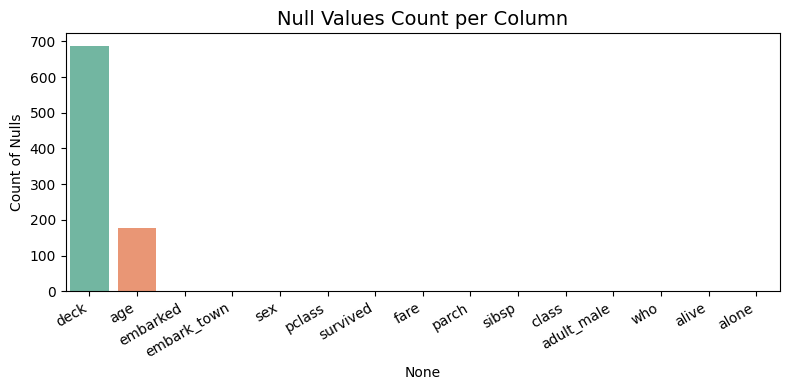

In [3]:
import pandas as pd
import seaborn as sns

# Example dataset
df = sns.load_dataset("titanic")

# Count of null values per column
null_count = df.isnull().sum()

# Percentage of null values per column
null_percent = (df.isnull().sum() / len(df)) * 100

# Combine into a single DataFrame
missing_df = pd.DataFrame({
    'Null Count': null_count,
    'Null Percentage': null_percent
}).sort_values(by='Null Count', ascending=False)

print(missing_df)

# Plot null counts
plt.figure(figsize=(8, 4))
sns.barplot(x=missing_df.index, y=missing_df['Null Count'], palette="Set2")
plt.title("Null Values Count per Column", fontsize=14)
plt.ylabel("Count of Nulls")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


WHEN THERE ARE TOO MANY NULL VALUES USE - THRESHOLD

In [4]:
import pandas as pd
import seaborn as sns

# Example dataset
df = sns.load_dataset("titanic")

# Threshold for dropping columns
threshold = 0.6  # 60%

# Drop columns with more than 60% null values
df_cleaned = df.loc[:, df.isnull().mean() <= threshold]

# Optional: see which columns were dropped
dropped_cols = df.columns.difference(df_cleaned.columns)
print("Dropped columns:", list(dropped_cols))

# View cleaned dataset
print(df_cleaned.head())


Dropped columns: ['deck']
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  


REPLACE NULL VALUE BY THEIR MEAN

In [5]:
import pandas as pd
import seaborn as sns

# Example dataset
df = sns.load_dataset("titanic")

# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Replace nulls with mean for each numerical column
for col in num_cols:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

# Optional: verify no nulls remain in numerical columns
print(df[num_cols].isnull().sum())


survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64


/tmp/ipython-input-1443114950.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


REMOVE OUTLIER USING IQR

In [6]:
import pandas as pd
import seaborn as sns

# Example dataset
df = sns.load_dataset("titanic")

# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Function to remove outliers using IQR
def remove_outliers(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Keep only rows within bounds
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Remove outliers
df_no_outliers = remove_outliers(df, num_cols)

# Optional: see how many rows were removed
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")


Original dataset shape: (891, 15)
Dataset shape after removing outliers: (436, 15)


ENCODING  - LABEL ENCODING FOR TREE BASED MODEL , LABEL - INT VALUES

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example dataset
data = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
    'Size': ['S', 'M', 'L', 'S', 'M']
}
df = pd.DataFrame(data)

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in df.columns:
    df[col] = le.fit_transform(df[col])

print(df)


   Color  Size
0      2     2
1      0     1
2      1     0
3      0     2
4      2     1


FREQUENCY BASED ENCODING FOR TREE BASED MODELS  - HERE TOTAL COUNT OF A SPECIFIC COLOR/ TOTAL VALUES IN THAT COLUMN

In [10]:
import pandas as pd

# Example dataset
data = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Red'],
    'Size': ['S', 'M', 'L', 'S', 'M', 'S']
}
df = pd.DataFrame(data)

# Apply frequency encoding
for col in df.columns:
    freq = df[col].value_counts() / len(df)
    df[col] = df[col].map(freq)

print(df)


      Color      Size
0  0.500000  0.500000
1  0.333333  0.333333
2  0.166667  0.166667
3  0.333333  0.500000
4  0.500000  0.333333
5  0.500000  0.500000


FOR NON TREE BASED MODEL ONE HOT ENCODING - FOR LINEAR MODELS

In [13]:
import pandas as pd

def one_hot_encode(df):
    """
    One-hot encodes all categorical columns in a DataFrame.
    Returns a new DataFrame with 0/1 columns.
    """
    # Select categorical columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    # Apply get_dummies (0/1 values)
    df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False)  # keep all categories

    return df_encoded

# Example usage
data = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
    'Size': ['S', 'M', 'L', 'S', 'M'],
    'Price': [10, 20, 30, 40, 50]
}
df = pd.DataFrame(data)

df_encoded = one_hot_encode(df)
print(df_encoded)


   Price  Color_Blue  Color_Green  Color_Red  Size_L  Size_M  Size_S
0     10       False        False       True   False   False    True
1     20        True        False      False   False    True   False
2     30       False         True      False    True   False   False
3     40        True        False      False   False   False    True
4     50       False        False       True   False    True   False
